# Assignment 3

Alexander Ly
027744520
CECS 456
Arjang Fahim

<img src="Assignment3Q1.jpg">

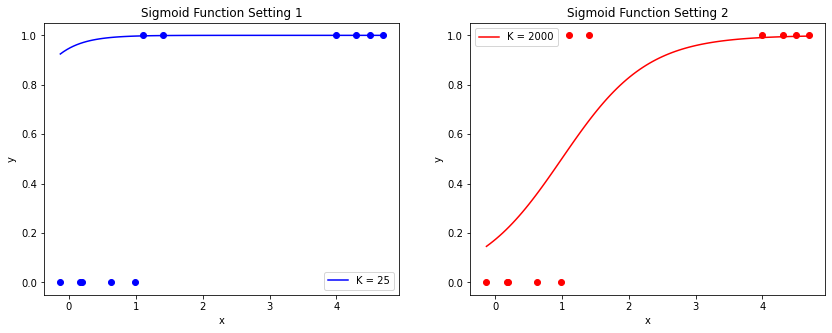

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create sigmoid function for plotting
def sig(x):
    return 1 / (1 + np.exp(-x))

# Create cross-entropy loss function for predictive value
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent function
def gradient_descent(x, y, w0, w1, alpha, K):
    n = len(x)
    losses = []

    for k in range(K):
        z = w0 + w1 * x
        y_pred = sig(z)

        gradient_w0 = np.sum(y_pred - y) / n
        gradient_w1 = np.sum((y_pred - y) * x) / n

        w0 -= alpha * gradient_w0
        w1 -= alpha * gradient_w1

        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)

    return w0, w1, losses

# Dataset
x = np.array([-0.129459521167643, 0.171267764387476, 0.18900686604508, 0.6281774644773, 0.986983828793992, 1.1, 1.39999999999999, 4, 4.29999999999999, 4.5, 4.7])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Initialize our weights and the amount of iterations
w0_initial = 3
w1_initial = 3
alpha = 0.01
K_1 = 25
K_2 = 2000
x_range = np.linspace(min(x), max(x), 100) 

# Use gradient descent on setting 1
w0_25, w1_25, _ = gradient_descent(x, y, w0_initial, w1_initial, alpha, K_1)

# Use gradient descent on setting 2
w0_2000, w1_2000, _ = gradient_descent(x, y, w0_initial, w1_initial, alpha, K_2)

# Create a figure to plot our sigmoid functions onto
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(14, 5))

# Create a plot for the first setting
plt1.scatter(x, y, color='blue')
plt1.plot(x_range, sig(w0_25 + w1_25 * x_range), color='blue', label='K = 25')
plt1.set_xlabel('x')
plt1.set_ylabel('y')
plt1.legend()
plt1.set_title('Sigmoid Function Setting 1')

# Create a plot for the second setting
plt2.scatter(x, y, color='red')
plt2.plot(x_range, sig(w0_2000 + w1_2000 * x_range), color='red', label='K = 2000')
plt2.set_xlabel('x')
plt2.set_ylabel('y')
plt2.legend()
plt2.set_title('Sigmoid Function Setting 2')
plt.show()